Модель, предсказывающая, есть ли болезнь сердца у пациента

In [2]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import os
import seaborn as sns

target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)
 Sex (1 = male; 0 = female)

In [3]:
#просмотр датасета
data = pd.read_csv('datasets_479954_897254_heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
#удаляем из датасета нулевые значения в строках
data = data.dropna(axis=0)

In [60]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#коэффициенты корреляции в датасете
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [62]:
#просмотр имеющихся колонок
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [63]:
y = data.target

In [82]:
data_features = ['age','cp', 'thalach', 'slope', 'thal', 'ca', 'oldpeak', 'exang']
X = data[data_features]
#выбор по корреляции(значения, самые близкие к 1 и к -1), также включим возраст

In [74]:
X.describe()

,age,cp,thalach,slope,thal,ca,oldpeak,exang
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,149.646865,1.399340,2.313531,0.729373,1.039604,0.326733
std,9.082101,1.032052,22.905161,0.616226,0.612277,1.022606,1.161075,0.469794
min,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,133.500000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,153.000000,1.000000,2.000000,0.000000,0.800000,0.000000
75%,61.000000,2.000000,166.000000,2.000000,3.000000,1.000000,1.600000,1.000000
max,77.000000,3.000000,202.000000,2.000000,3.000000,4.000000,6.200000,1.000000


In [75]:
X.head()

,age,cp,thalach,slope,thal,ca,oldpeak,exang
0,63,3,150,0,1,0,2.3,0
1,37,2,187,0,2,0,3.5,0
2,41,1,172,2,2,0,1.4,0
3,56,1,178,2,2,0,0.8,0
4,57,0,163,2,2,0,0.6,1


In [195]:
from sklearn import tree
disease_model = DecisionTreeRegressor(random_state=1)
disease_model.fit(X, y)  #тренировка модели

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [196]:
print("Сделаем предсказания для первых пяти случаев:")
print(X.head())
print("Предсказания:")
print(disease_model.predict(X.head()))

Сделаем предсказания для первых пяти случаев:
   age  cp  thalach  slope  thal  ca  oldpeak  exang
0   63   3      150      0     1   0      2.3      0
1   37   2      187      0     2   0      3.5      0
2   41   1      172      2     2   0      1.4      0
3   56   1      178      2     2   0      0.8      0
4   57   0      163      2     2   0      0.6      1
Предсказания:
[1. 1. 1. 1. 1.]


In [197]:
print("Теперь предсказания для всех:")
print(X)
print("Предсказания:")
print(disease_model.predict(X))

Теперь предсказания для всех:
     age  cp  thalach  slope  thal  ca  oldpeak  exang
0     63   3      150      0     1   0      2.3      0
1     37   2      187      0     2   0      3.5      0
2     41   1      172      2     2   0      1.4      0
3     56   1      178      2     2   0      0.8      0
4     57   0      163      2     2   0      0.6      1
..   ...  ..      ...    ...   ...  ..      ...    ...
298   57   0      123      1     3   0      0.2      1
299   45   3      132      1     3   0      1.2      0
300   68   0      141      1     3   2      3.4      0
301   57   0      115      1     3   1      1.2      1
302   57   1      174      1     2   1      0.0      0

[303 rows x 8 columns]
Предсказания:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

predicted_disease_or_not = disease_model.predict(X)
mean_absolute_error(y, predicted_disease_or_not)  #рассчитываем mean absolute error

0.0

In [199]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
disease_model = DecisionTreeRegressor()
disease_model.fit(train_X, train_y) #более точная валидация

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [200]:
val_predictions = disease_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions)) 

0.19736842105263158


Таким образом, по MAE предсказание отличается от реальности на 0.15789473684210525

Также можно посчитать коэффициент детерминации

In [201]:
treeClassifier = tree.DecisionTreeClassifier(min_samples_leaf=10, max_leaf_nodes=6).fit(X, y)

In [202]:
print(str(treeClassifier.score(X, y)))  #получаем коэффициент детерминации

0.8250825082508251


Коэффициент детерминации довольно близко к единице, модель работает неплохо.

У кого чаще встречаются болезни сердца (пол, возраст)? У кого реже?

In [84]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#выделяем датафрейм только с женщинами
data_female = data['sex'].isin(['0'])
data_f = data[data_female]

In [7]:
data_f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [8]:
#считаем количество женщин, имеющих болезнь сердца или нет
data_f.target.value_counts()

1    72
0    24
Name: target, dtype: int64

Среди 96 пациентов-женщин 72 имеют болезнь сердца. Это 75%

In [5]:
#датафрейм с мужчинами
data_male = data['sex'].isin(['1'])
data_m = data[data_male]

In [208]:
data_m.target.value_counts()

0    114
1     93
Name: target, dtype: int64

Среди 207 пациентов-мужчин 93 имеют болезнь сердца. Это примерно 45%. 
Таким образом, по этим данным женщины больше предрасположены к сердечным заболеваниям. У мужчин они встречаются реже.

Посмотрим зависимость от возраста. Разобьем выборку на 3 группы: от 29 до 45 лет, от 46 до 60 и от 61 до 77

In [10]:
#фильтруем датасет по возрасту
data_young = data[(data['age'] > 28) & (data['age'] < 46)]
data_young

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


In [11]:
#определяем, сколько человек из отфильтрованного датасета имеют болезнь сердца, а сколько нет
data_young.target.value_counts()

1    48
0    16
Name: target, dtype: int64

Среди пациентов младше 46 лет 48 человек из 64 имеют сердечное заболевание. Это 75%

In [211]:
data_not_old = data[(data['age'] > 45) & (data['age'] < 61)]
data_not_old

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [212]:
data_not_old.target.value_counts()

1    82
0    78
Name: target, dtype: int64

Среди людей от 45 до 60 лет примерно 51% имеют сердечные заболевания

In [215]:
data_old = data[(data['age'] > 60)]
data_old

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [216]:
data_old.target.value_counts()

0    44
1    35
Name: target, dtype: int64

Среди людей старше 60 лет около 44% имеют сердечные заболевания. 

Таким образом, младшая группа имеет самую высокую предрасположенность по этим данным. У самой старшей группы встречается реже. Однако это может быть связано с тем, что для самой младшей группы меньше всего пациентов для исследования. 

Как зависит холестерин от возраста у здоровых людей?

In [217]:
#выделяем датасет со здоровыми людьми
data_healthy = data['target'].isin(['0'])
data_h = data[data_healthy]

In [218]:
import matplotlib.pyplot as plt

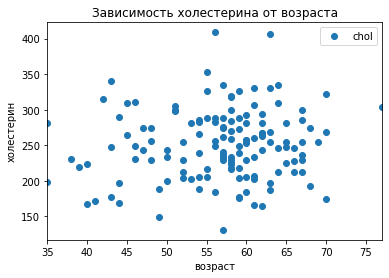

In [219]:
#строим график зависимости
data_h.plot(x='age', y='chol', style='o')  
plt.title('Зависимость холестерина от возраста')  
plt.xlabel('возраст')  
plt.ylabel('холестерин')  
plt.show()

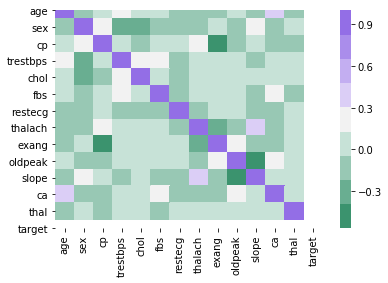

In [220]:
#строим график корреляции
data_h.corr()
sns.heatmap(data_h.corr(), cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

Из двух выше графиков видно, что зависимость уровня холестерина от возраста у здоровых людей на уровне нуля.